# Part 2: The Wine Dataset

The Wine dataset is a commonly used dataset in machine learning and data analysis, primarily for classification tasks. It represents the results of a chemical analysis of wines originating from three different grape varieties (classes). Each class corresponds to a different type of wine. The dataset contains a set of features derived from this chemical analysis.

- Number of Classes: 3 (representing three different types of wines)
- Number of Samples: 178
- Number of Features: 13 (chemical attributes)

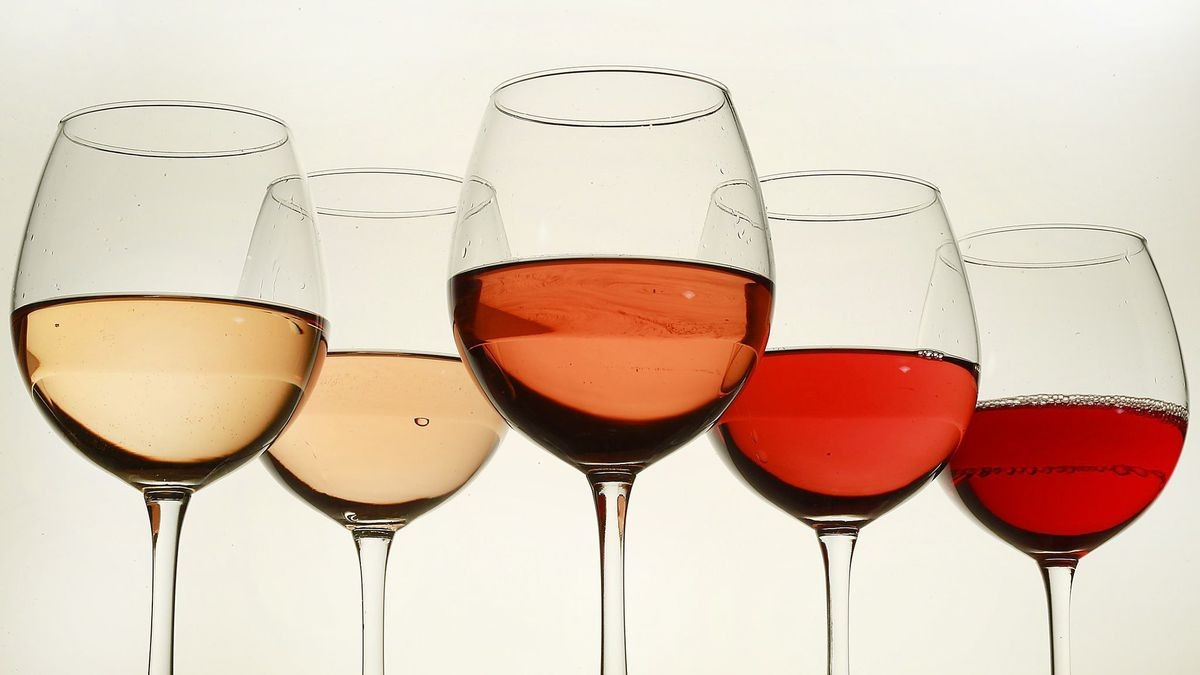

Let's now repeat the process with this new dataset.

In [17]:
from sklearn import datasets
import pandas as pd

# Load the Wine dataset
wine = datasets.load_wine()

# Extract the features (X) and target labels (y)
X = wine.data
y = wine.target

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [18]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


The plots we did before can be easily done using **seaborn**, a fantastic visualization library. Investigate how we can use the `pairplot` [function](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a plot using the dataframe we just created.

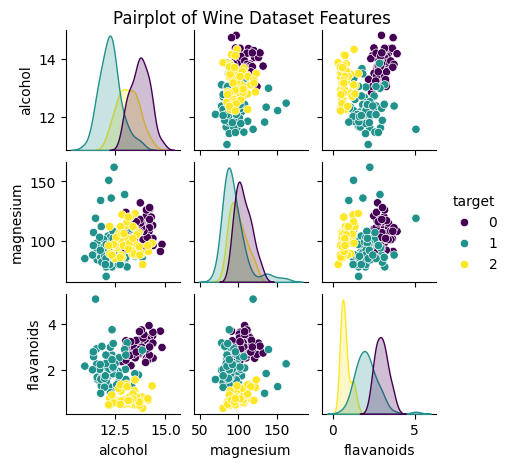

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(wine_df, hue='target',
             palette='viridis',
             diag_kind='kde',
             x_vars=['alcohol', 'magnesium', 'flavanoids'],
             y_vars=['alcohol', 'magnesium', 'flavanoids'],
             height=1.5
             )
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()

In [20]:
from sklearn import datasets
# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [22]:
## use a random forest classifier to indentify the wines
## Get the accuracy of your model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

GBC = GradientBoostingClassifier()

GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(acc)


RFC = RandomForestClassifier()

RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)


0.9259259259259259
0.9814814814814815


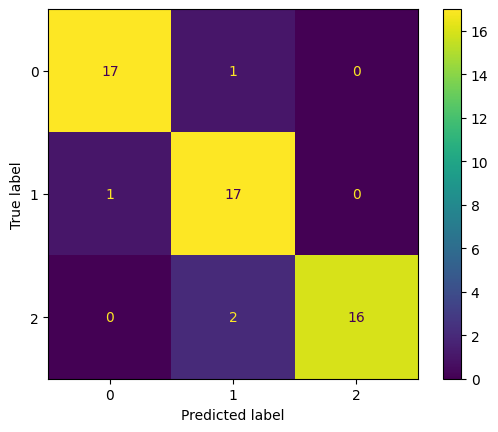

In [23]:
## Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(GBC, X_test, y_test)

Great! Now that we trained the model, let's see if training a model with less features afects the model. We will use the following function: [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html). It has to be used as any other sklearn model. You can use the functions `.fit` and `.transform` to train and transform data.




In [35]:
## Use Select KBest to select N amount of features.
## test this features using the same classifier you used
from sklearn.feature_selection import SelectKBest, chi2

num_of_features = 5
feature_selector = SelectKBest(k=num_of_features)
X_new_train = feature_selector.fit_transform(X_train, y_train)
X_new_test = feature_selector.transform(X_test)




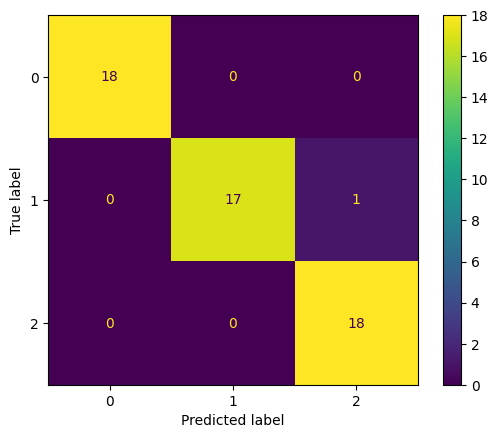

In [37]:
## Display the confusion matrix
classifier = RandomForestClassifier()

classifier.fit(X_new_train, y_train)


ConfusionMatrixDisplay.from_estimator(classifier, X_new_test, y_test)

In [38]:
import numpy as np

# Get a boolean mask of selected features
selected_feature_mask = feature_selector.get_support()

# Get the names of the selected features
selected_feature_names = np.array(wine.feature_names)[selected_feature_mask]

print(selected_feature_names)

['alcohol' 'flavanoids' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']


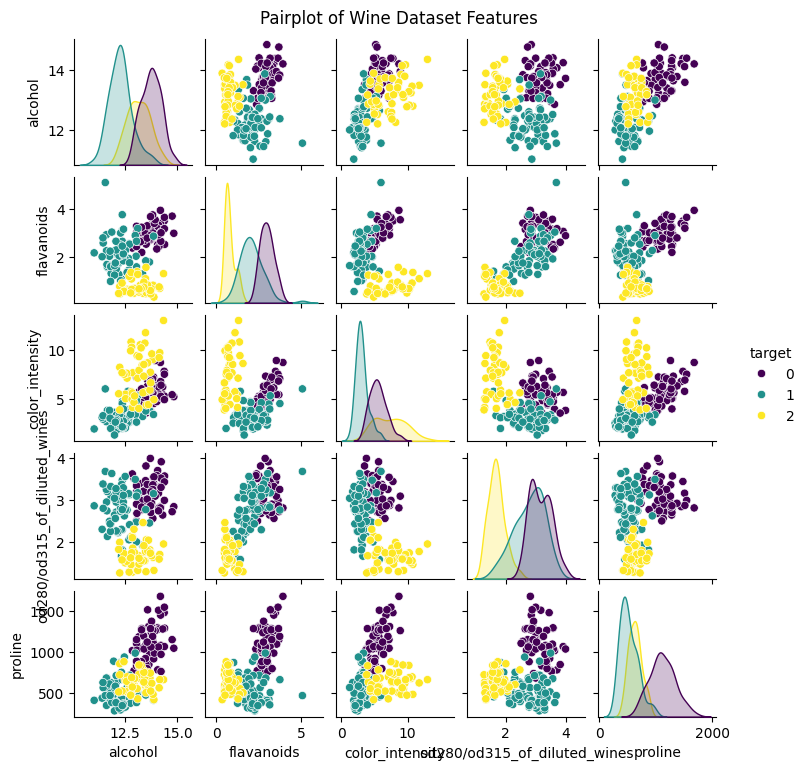

In [39]:
## Let's visualize these features

import seaborn as sns

sns.pairplot(wine_df, hue='target',
             palette='viridis',
             diag_kind='kde',
             x_vars=selected_feature_names,
             y_vars=selected_feature_names,
             height=1.5
             )
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()